#  germantrafficsigns

In [48]:
#load the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from scipy.io import loadmat
import pickle
from sklearn.utils import shuffle
import os
import warnings
warnings.filterwarnings("ignore")

In [49]:
path = '../ten-datasets/germantrafficsigns/'

#load the dataset into a dataframe
df = pd.read_csv(path + 'signnames.csv')

In [50]:
print(df.shape)
df.head()

(43, 2)


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [51]:
num_classes = df.shape[0]
num_classes

43

In [52]:
training_file = path+"train.p"
testing_file = path+"test.p"
validation_file= path+"valid.p"


In [53]:
with open(training_file, mode='rb') as f:
    train_data = pickle.load(f)
    
with open(testing_file, mode='rb') as f:
    test_data = pickle.load(f)
    
with open(validation_file, mode='rb') as f:
    valid_data = pickle.load(f)

In [54]:
X_train, y_train = train_data['features'],train_data['labels']
X_test, y_test = test_data['features'],test_data['labels']
X_valid, y_valid = valid_data['features'],valid_data['labels']

In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(34799, 32, 32, 3)
(34799,)
(4410, 32, 32, 3)
(4410,)


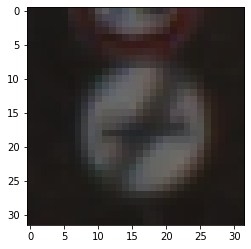

In [56]:
plt.imshow(X_train[0])

In [57]:
print("Number of classes: {}".format(num_classes))
print("Image Shape: {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Number of classes: 43
Image Shape: (32, 32, 3)
Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


# Preprocess Data
## Shuffle the training data.


(34799, 32, 32, 3)

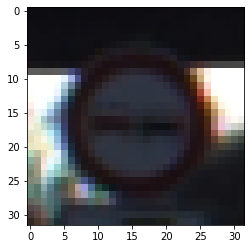

In [58]:
X_train, y_train = shuffle(X_train, y_train)
plt.imshow(X_train[0])
X_train.shape

# shallow learning
> ### svm 

> ### RandomForest

> ### Softmax Regression


## svm

### gray img

In [59]:
import cv2

In [60]:
def equi_hist(image):
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    return image

In [61]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img
#     img = grayscale(X_train[1000])
#     plt.imshow(img)
#     plt.axis("off")

def equalize(img):
    img = cv2.equalizeHist(img)
    return img
#     img = equalize(img)
#     plt.imshow(img)
#     plt.axis("off")
#     print(img.shape)

def preprocess(img):
    img = grayscale(img)
    img = equalize(img)
    img = img/255
    return img

In [62]:
X_train_adv = np.array(list(map(preprocess, X_train)))
X_test_adv = np.array(list(map(preprocess, X_test)))
X_valid_adv = np.array(list(map(preprocess, X_valid)))


In [63]:
X_train_adv.shape

(34799, 32, 32)

In [64]:
def to_2_dim(X_org):
    print(X_org.shape)
    X_size = len(X_org)
    TwoDim_X = X_org.reshape(X_size,-1)
    print(TwoDim_X.shape)
    return TwoDim_X


In [65]:
TwoDim_X_train_adv= to_2_dim(X_train_adv)

(34799, 32, 32)
(34799, 1024)


In [66]:
TwoDim_X_test_adv = to_2_dim(X_test_adv)
TwoDim_X_valid_adv = to_2_dim(X_valid_adv)

(12630, 32, 32)
(12630, 1024)
(4410, 32, 32)
(4410, 1024)


### pca 

pca.components_ (190, 1024)
pca_var_ratio (190,)


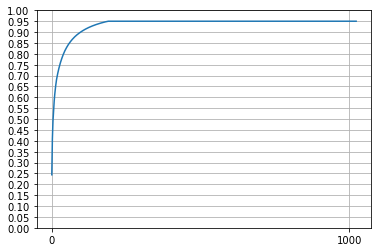

CPU times: user 34.6 s, sys: 2.54 s, total: 37.2 s
Wall time: 11.8 s


In [67]:
%%time

from sklearn.decomposition import PCA

X= TwoDim_X_train_adv
y=y_train
pca=PCA(n_components=0.95)
pca.fit(X,y)
ratio=pca.explained_variance_ratio_
print("pca.components_",pca.components_.shape)
print("pca_var_ratio",pca.explained_variance_ratio_.shape)
plt.plot([i for i in range(X.shape[1])],[np.sum(ratio[:i+1]) for i in range(X.shape[1])])
plt.xticks(np.arange(X.shape[1],step=1000))
plt.yticks(np.arange(0,1.01,0.05))
plt.grid()
plt.show()


In [68]:
def pca(TwoDim_X):
    target_dim = ratio.shape[0]
    pca_target=PCA(n_components=target_dim)
    reduced_X = pca_target.fit_transform(TwoDim_X)
    print(reduced_X.shape )
    return reduced_X

In [69]:
%%time
reduced_X_train = pca(TwoDim_X_train_adv)
reduced_X_test = pca(TwoDim_X_test_adv)
reduced_X_valid = pca(TwoDim_X_valid_adv)

(34799, 190)
(12630, 190)
(4410, 190)
CPU times: user 26 s, sys: 1.31 s, total: 27.3 s
Wall time: 7.52 s


In [70]:
# from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

*****

In [72]:
%%time

svm = SVC(kernel='sigmoid', class_weight='balanced', probability=True,C=10.0)

# svm= SVC(C=1, kernel='rbf', degree=2, gamma=0.005,coef0=1,shrinking=True, tol=0.5,probability=False,
#         max_iter=-1,)
# svm = SVC(kernel = 'linear',C=1.0, random_state=1, probability = True )
# svm = LinearSVC(penalty='l2', loss='hinge', class_weight='balanced')
svm.fit(reduced_X_train, y_train)
# svm.fit(TwoDim_X_train_adv, y_train)

CPU times: user 12min 38s, sys: 6.24 s, total: 12min 44s
Wall time: 12min 49s


SVC(C=10.0, break_ties=False, cache_size=200, class_weight='balanced',
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='sigmoid', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [73]:
%%time
# y_train_predict = svm.predict(reduced_X_train)

y_train_predict = svm.predict(reduced_X_train)
# y_train_predict = svm.predict_proba(TwoDim_X_train_adv).argmax(axis = 1)
print ("SVM Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))
y_train_predict

Logistic Train Accuracy: 0.390
CPU times: user 3min 51s, sys: 3.05 s, total: 3min 55s
Wall time: 4min 1s


array([35, 22, 22, ..., 11, 22, 12], dtype=uint8)

In [74]:
%%time
# y_test_predict = svm.predict(reduced_X_test)

y_test_predict = svm.predict(reduced_X_test)
# y_test_predict = svm.predict_proba(X_test_adv).argmax(axis = 1)
print("SVM Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

Logistic Test Accuracy: 0.052
CPU times: user 1min 24s, sys: 1.4 s, total: 1min 25s
Wall time: 1min 29s


In [75]:
accuracy = accuracy_score(y_train.flatten(),y_train_predict)
print(accuracy)

0.3898100520129889


In [76]:
accuracy = accuracy_score(y_test.flatten(),y_test_predict)
print(accuracy)

0.051860649247822646


In [77]:
## TwoDim_X_valid_adv

In [78]:
y_valid_predict = svm.predict_proba(reduced_X_valid).argmax(axis = 1)


## Random Forest


In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
%%time

forest = RandomForestClassifier(criterion='gini', max_leaf_nodes=50,
                                n_estimators = 800, random_state =1,
                                n_jobs =-1,verbose=True, oob_score=True)
# forest.fit(TwoDim_X_train,y_train)
forest.fit(TwoDim_X_train_adv,y_train)
# forest.fit(reduced_X_train,y_train)
forest.oob_score_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   44.0s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.3min finished


CPU times: user 9min 7s, sys: 8.46 s, total: 9min 16s
Wall time: 1min 40s


0.6644731170435932

In [81]:
%%time
# y_train_predict = forest.predict_proba(TwoDim_X_train).argmax(axis = 1)
y_train_predict = forest.predict_proba(TwoDim_X_train_adv).argmax(axis = 1)
# y_train_predict = forest.predict_proba(reduced_X_train).argmax(axis = 1)
print ("forest Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))
y_train_predict

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    3.3s


Logistic Train Accuracy: 0.678
CPU times: user 22.9 s, sys: 2 s, total: 24.9 s
Wall time: 6.06 s


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    5.8s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    5.9s finished


array([ 9,  1, 11, ..., 12, 18, 17])

In [82]:
%%time

# y_test_predict = forest.predict_proba(TwoDim_X_test).argmax(axis = 1)
y_test_predict = forest.predict_proba(TwoDim_X_test_adv).argmax(axis = 1)
# y_test_predict = forest.predict_proba(reduced_X_test).argmax(axis = 1)
print("forest Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    1.3s


Logistic Test Accuracy: 0.625
CPU times: user 8.5 s, sys: 947 ms, total: 9.44 s
Wall time: 2.51 s


[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    2.3s
[Parallel(n_jobs=8)]: Done 800 out of 800 | elapsed:    2.3s finished


In [83]:
accuracy = accuracy_score(y_train,y_train_predict)
print(accuracy)

0.6776056783240898


## Softmax Regression

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
%%time
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(TwoDim_X_train_adv, y_train)

CPU times: user 1min 28s, sys: 2.5 s, total: 1min 30s
Wall time: 23 s


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
%%time
y_train_predict = softmax_reg.predict_proba(TwoDim_X_train_adv).argmax(axis = 1)
print ("softmax_reg Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

Logistic Train Accuracy: 0.912
CPU times: user 621 ms, sys: 26 ms, total: 647 ms
Wall time: 171 ms


In [87]:
y_test_predict = softmax_reg.predict_proba(TwoDim_X_test_adv).argmax(axis = 1)
print("softmax_reg Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

Logistic Test Accuracy: 0.796


In [88]:
y_valid_predict = softmax_reg.predict_proba(TwoDim_X_valid_adv).argmax(axis = 1)
print("softmax_reg Test Accuracy: %.3f" % accuracy_score(y_valid,y_valid_predict))

Logistic Test Accuracy: 0.802


# deep learning
> ### ANN
> ### CNN

In [89]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,MaxPooling1D,GlobalAveragePooling2D
from keras import backend as K
from keras.layers.recurrent import SimpleRNN
from keras.utils.vis_utils import plot_model

In [90]:
print(X_train.shape)
print(y_train.shape)
y_train[0]

(34799, 32, 32, 3)
(34799,)


9

# Normalization


In [91]:

batch_size = 128
num_classes = 43 # 10
epochs = 12

# input image dimensions
img_rows, img_cols = 32, 32 

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 3)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 3)
input_shape = (img_rows, img_cols, 3)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print(y_train.shape)
print(y_test.shape)

# convert class vectors to binary class matrices  
y_train = keras.utils.to_categorical(y_train, num_classes) #one hot encoding
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

X_train shape: (34799, 32, 32, 3)
34799 train samples
12630 test samples
(34799,)
(12630,)


(34799, 43)

## CNN

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 16384)             0         
_________________________________________________________________
dense_33 (Dense)             (None, 128)               2097280   
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)             

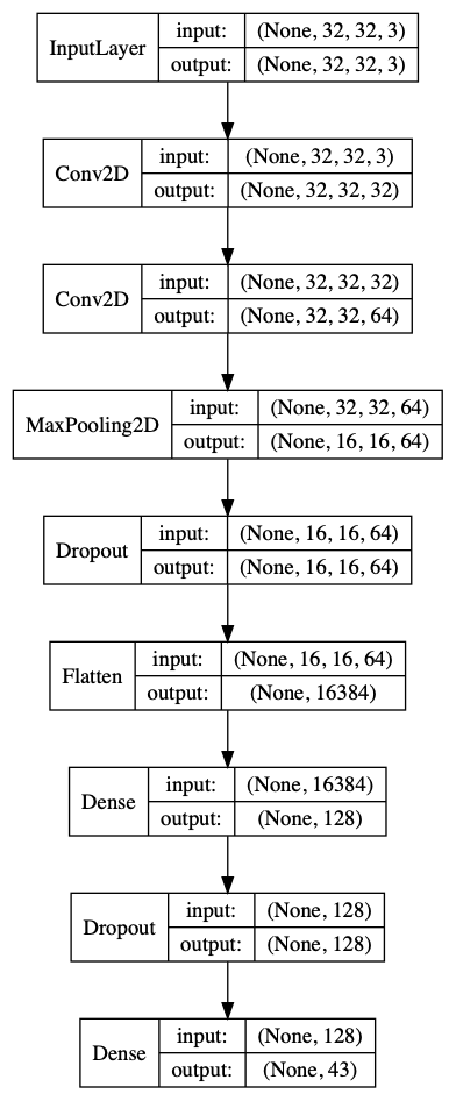

In [92]:

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',padding='same',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


image_name = 'trafficSigns_cnn_model.png'
plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
plt.figure(figsize=(20,20))
img = plt.imread(image_name)
plt.imshow(img)
plt.axis('off')
plt.show()

In [93]:
%%time

hist = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=5,
                    verbose=1,
                    validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 34799 samples, validate on 12630 samples
Epoch 1/5
34799/34799 [==============================] - 126s 4ms/step - loss: 1.7931 - accuracy: 0.5022 - val_loss: 0.6437 - val_accuracy: 0.8306
Epoch 2/5
34799/34799 [==============================] - 127s 4ms/step - loss: 0.6184 - accuracy: 0.8074 - val_loss: 0.3851 - val_accuracy: 0.8991
Epoch 3/5
34799/34799 [==============================] - 132s 4ms/step - loss: 0.4020 - accuracy: 0.8716 - val_loss: 0.2839 - val_accuracy: 0.9230
Epoch 4/5
34799/34799 [==============================] - 129s 4ms/step - loss: 0.3002 - accuracy: 0.9061 - val_loss: 0.2574 - val_accuracy: 0.9317
Epoch 5/5
34799/34799 [==============================] - 131s 4ms/step - loss: 0.2454 - accuracy: 0.9203 - val_loss: 0.2458 - val_accuracy: 0.9349
Test loss: 0.24582967808203196
Test accuracy: 0.9349168539047241
CPU times: user 47min 50s, sys: 11min 13s, total: 59min 3s
Wall time: 10min 57s


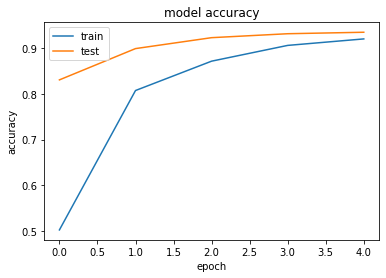

In [94]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

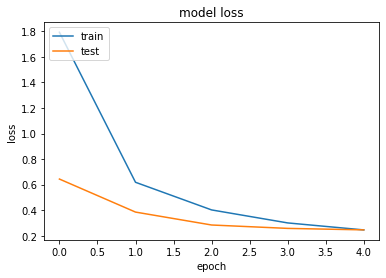

In [95]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [96]:
score = model.evaluate(X_test, y_test, verbose=0)


In [97]:
predictions = model.predict(X_test) #X_test, y_test

In [98]:
predictions[2]

array([0.0000000e+00, 0.0000000e+00, 4.9514708e-32, 2.4486642e-29,
       0.0000000e+00, 1.3462899e-36, 1.2296779e-31, 0.0000000e+00,
       6.4040560e-34, 2.0048468e-31, 1.3238872e-35, 0.0000000e+00,
       3.8949987e-34, 1.6111694e-28, 0.0000000e+00, 2.2149032e-36,
       0.0000000e+00, 0.0000000e+00, 1.8325703e-32, 0.0000000e+00,
       7.2552920e-23, 0.0000000e+00, 0.0000000e+00, 1.2517954e-30,
       0.0000000e+00, 3.7185058e-34, 4.3447124e-38, 0.0000000e+00,
       4.0171465e-37, 1.3504652e-38, 4.1776720e-34, 4.9985475e-35,
       9.1208955e-29, 2.3849144e-23, 3.2999636e-17, 3.5531789e-20,
       4.1062896e-18, 2.2045228e-32, 1.0000000e+00, 2.8065472e-24,
       4.2343547e-20, 3.4123552e-28, 1.3746172e-32], dtype=float32)

In [99]:
y_test[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# ANN

In [100]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.layers import Flatten,Conv1D,GlobalMaxPooling1D,MaxPooling1D,GlobalAveragePooling1D,Input,MaxPool1D,BatchNormalization


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 3072)              0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 43)                11051     
Total params: 1,715,755
Trainable params: 1,715,755
Non-trainable params: 0
___________________________________________

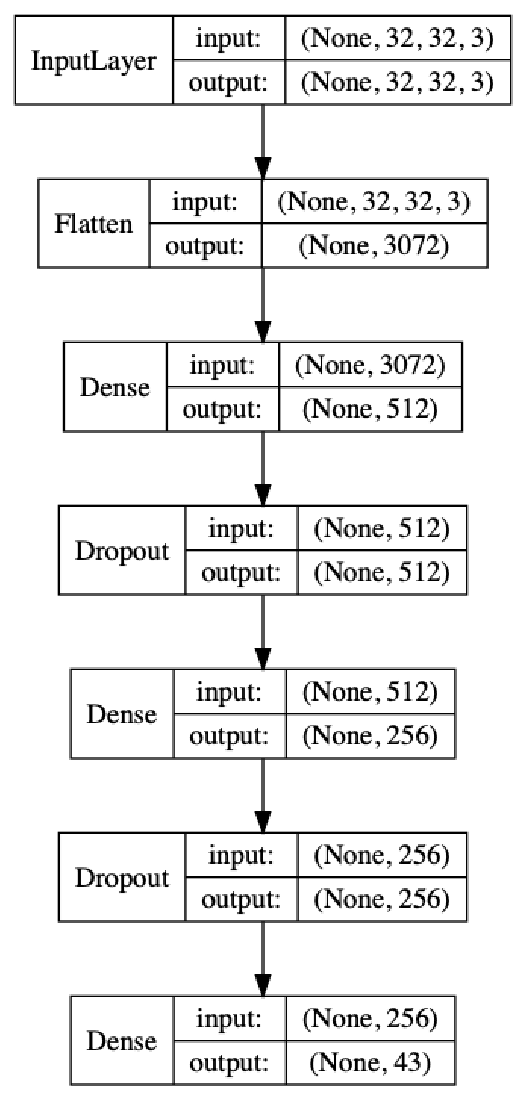

In [101]:
model = Sequential()
# model.add(Flatten(input_shape=X_train.shape + (3,)))
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512, activation='tanh'))
model.add(Dropout(0.25))

model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.25))


model.add(Dense(43, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


image_name = 'trafficSigns_ann_model.png'
plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
plt.figure(figsize=(20,20))
img = plt.imread(image_name)
plt.imshow(img)
plt.axis('off')
plt.show()

In [102]:
hist = model.fit(X_train, y_train,batch_size=128,epochs=10,verbose=1,shuffle=True,
                 validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 34799 samples, validate on 12630 samples
Epoch 1/10
34799/34799 [==============================] - 14s 388us/step - loss: 2.1439 - accuracy: 0.4052 - val_loss: 1.1860 - val_accuracy: 0.6659
Epoch 2/10
34799/34799 [==============================] - 11s 305us/step - loss: 0.8887 - accuracy: 0.7334 - val_loss: 0.8101 - val_accuracy: 0.7678
Epoch 3/10
34799/34799 [==============================] - 11s 325us/step - loss: 0.6102 - accuracy: 0.8188 - val_loss: 0.7138 - val_accuracy: 0.7971
Epoch 4/10
34799/34799 [==============================] - 11s 306us/step - loss: 0.5155 - accuracy: 0.8460 - val_loss: 0.6506 - val_accuracy: 0.8297
Epoch 5/10
34799/34799 [==============================] - 14s 396us/step - loss: 0.4669 - accuracy: 0.8617 - val_loss: 0.6849 - val_accuracy: 0.8131
Epoch 6/10
34799/34799 [==============================] - 14s 414us/step - loss: 0.4257 - accuracy: 0.8721 - val_loss: 0.6185 - val_accuracy: 0.8390
Epoch 7/10
34799/34799 [==============================] 

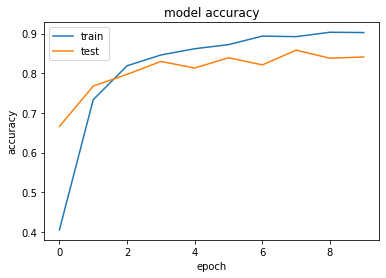

In [103]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

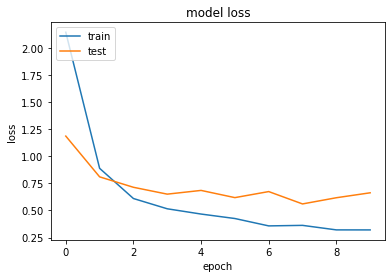

In [104]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [105]:
predictions = model.predict(X_test) #X_test, y_test

In [106]:
predictions[2]

array([4.66924507e-14, 1.07533401e-13, 2.27467004e-11, 2.71308167e-08,
       2.65916976e-12, 2.76159678e-10, 7.19388493e-10, 1.15728434e-12,
       2.23606489e-09, 3.25320082e-09, 2.78049580e-11, 1.71697086e-12,
       8.27273458e-11, 1.43295509e-09, 1.51841335e-11, 6.80730894e-09,
       8.02246186e-11, 3.49031432e-13, 3.26181859e-09, 1.07891595e-11,
       1.53856221e-04, 2.05840289e-14, 4.97432451e-09, 7.95120303e-10,
       1.59127225e-10, 1.25138255e-08, 7.72284459e-10, 8.71855435e-11,
       5.03378583e-09, 2.22802488e-11, 3.94317939e-10, 4.58737631e-11,
       5.38296376e-08, 3.79659672e-11, 1.30830722e-06, 4.26356763e-07,
       9.58908095e-06, 2.75518330e-10, 9.99834418e-01, 7.26451954e-11,
       7.91205892e-08, 1.96166837e-07, 2.32845687e-11], dtype=float32)

In [107]:
y_test[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## RNN

In [108]:
from keras.layers.recurrent import SimpleRNN

In [109]:
print(X_train_adv.shape)
print(X_test_adv.shape)

(34799, 32, 32)
(12630, 32, 32)


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 50)                4150      
_________________________________________________________________
dense_38 (Dense)             (None, 43)                2193      
Total params: 6,343
Trainable params: 6,343
Non-trainable params: 0
_________________________________________________________________


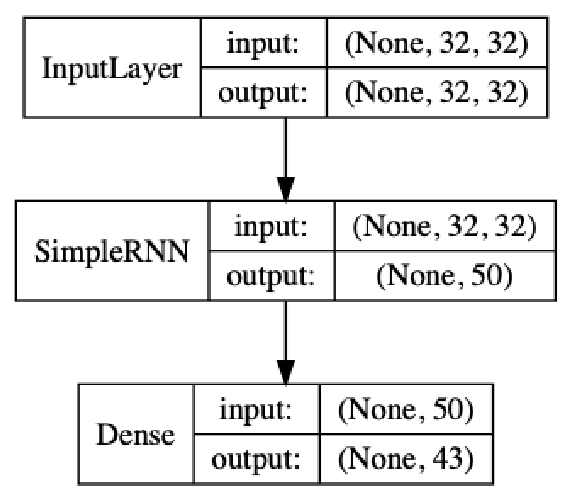

In [110]:
model = Sequential()
model.add(SimpleRNN(units = 50, input_shape=(32,32) ))
# model.add(Dropout(0.2))
# model.add(SimpleRNN(units = 50 ))
# model.add(Dropout(0.2))
# model.add(SimpleRNN(50,return_sequences=True))

model.add(Dense(43,activation = "softmax"))
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

image_name = 'trafficSigns_rnn_model.png'
plot_model(model,to_file=image_name,show_shapes=True,show_layer_names=False,rankdir='TB')
plt.figure(figsize=(10,10))
img = plt.imread(image_name)
plt.imshow(img)
plt.axis('off')
plt.show()

In [111]:
hist = model.fit(X_train_adv, y_train,batch_size=128,epochs=20,verbose=1,shuffle=True,
                 validation_data=(X_test_adv, y_test))
score = model.evaluate(X_test_adv, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 34799 samples, validate on 12630 samples
Epoch 1/20
34799/34799 [==============================] - 5s 138us/step - loss: 3.3055 - accuracy: 0.1145 - val_loss: 2.8659 - val_accuracy: 0.2370
Epoch 2/20
34799/34799 [==============================] - 4s 115us/step - loss: 2.3029 - accuracy: 0.3532 - val_loss: 2.1192 - val_accuracy: 0.3695
Epoch 3/20
34799/34799 [==============================] - 4s 106us/step - loss: 1.7984 - accuracy: 0.4594 - val_loss: 1.8152 - val_accuracy: 0.4505
Epoch 4/20
34799/34799 [==============================] - 4s 104us/step - loss: 1.5450 - accuracy: 0.5335 - val_loss: 1.6233 - val_accuracy: 0.5101
Epoch 5/20
34799/34799 [==============================] - 4s 105us/step - loss: 1.3637 - accuracy: 0.5812 - val_loss: 1.5054 - val_accuracy: 0.5451
Epoch 6/20
34799/34799 [==============================] - 4s 106us/step - loss: 1.2439 - accuracy: 0.6173 - val_loss: 1.4399 - val_accuracy: 0.5733
Epoch 7/20
34799/34799 [==============================] - 4s 1

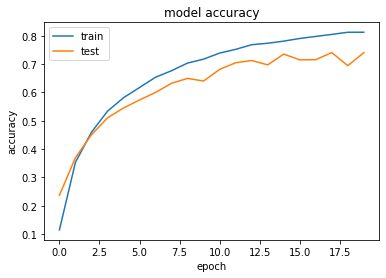

In [112]:
plt.figure()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')

plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

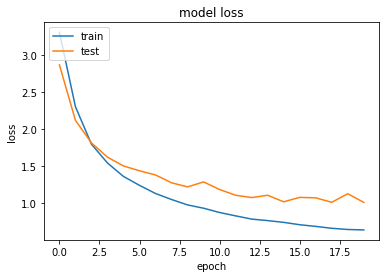

In [113]:
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()